<a href="https://colab.research.google.com/github/Trolloldem/Data-Science-Full-Stack-Assignment-of-Gianluca-Oldani/blob/master/Notebook_assignment_Gianluca_Oldani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment di Gianluca Oldani
Il problema assegnato appartiene alla categoria dei problemi di **regressione**, dove la variabile target di cui si vuole prevedere il valore è una variabile reale.
L'approccio adottato per risolvere il problema e fare alcune valutazioni sul modello sviluppato sarà una regressione lineare multi-variabile.
Questo notebook viene utilizzato per spiegare al meglio i ragionamenti seguiti durante l'implementazione della soluzione.

# Connessione al database e recupero dello schema dei dati
Il primo passo per risolvere il problema, è recuperare i dati dal database. Questa operazione è stata effettuata tramite il driver python3 per PostgreSQL **psycopg2**. Le operazioni di seguito riportate sono implementate all'interno del modulo **db_connection.data_fetch**, nella funzione **get_data_from_db**, richiamata come prima operazione all'interno del main del programma.

In [1]:
    import psycopg2
    
    try:

        #impostazione credenziali DB

        connect_str = {
            'dbname': '<DB_NAME>',
            'user': '<USERNAME>',
            'password': '<PASSWORD>',
            'host': '<HOST_URL>',
            'sslmode': '<SSLMODE>',
            'port': '<PORT>',
        }

        #creazione connessione al DB
        conn = psycopg2.connect(**connect_str)

        #creazione esecutore query
        cursor = conn.cursor()

        #query tabella variabile target
        cursor.execute("""SELECT * from <TABLE_NAME>""")
        conn.commit()

        rows_y = cursor.fetchall()

        #Stampa dello schema dei dati target
        print(cursor.description)

        # query tabella regressori
        cursor.execute("""SELECT * from <TABLE_NAME>""")
        conn.commit()

        rows_x = cursor.fetchall()

        # Stampa dello schema dei dati target
        print(cursor.description)

        #chiusura connessione al db e gestore query
        cursor.close()
        conn.close()

    except Exception as e:
        print(e)

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


(Column(name='ID', type_code=20, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None), Column(name='PE', type_code=701, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None))
(Column(name='ID', type_code=20, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None), Column(name='AT', type_code=701, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None), Column(name='V', type_code=701, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None), Column(name='AP', type_code=701, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None), Column(name='RH', type_code=701, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None))


La tabella relativa alla variabile target presenta i seguenti campi:

*   ID, chiave primaria della misura;
*   PE, potenza generata dall'impianto.

La tabella relativa alle features presenta i seguenti campi:
*   ID, chiave primaria della misura;
*   AT, temperatura ambientale;
*   V,  ''vuoto''
*   AP, pressione ambientale;
*   RH, umidità relativa.

Nella soluzione si suppone che tuple col medesimo ID siano relative alla stessa misura.





# Analisi preliminari e visualizzazione dei dati
Dopo essermi occupato di recuperare i dati dal database, il secondo passo della soluzione implementata è stato analizzare i dati alla ricerca di anomalie o problematiche.
Per fare ciò, i dati sono stati organizzati come segue:


1.   I valori della variabile target PE sono stati inseriti all'interno di    
vettore 1D;
2.   I valori delle features sono stati inseriti all'interno di una matrice con dimensioni N_OSSERVAZIONI X N_FEATURE;
3    Gli ID relativi a target e feature sono stati inseriti all'interno di 2 vettori 1D separati.

Di seguito è presentata l'implementazione del metodo **plot_preparation** implementato all'interno del modulo **data_preparation.data_manipulation**.



In [0]:
    import numpy as np
    y = []

    AT = []
    V = []
    AP = []
    RH = []

    X = []

    index_x = []
    index_y = []

    # schema regressori:
    # posizione 0 : indice
    # posizione 1 : AT
    # posizione 2 : V
    # posizione 3 : AP
    # posizione 4 : RH

    # schema target:
    # posizione 0 : indice
    # posizione 1 : PE

    for elemx, elemy in zip(rows_x, rows_y):
        index_y.append(elemy[0])
        y.append(elemy[1])

        index_x.append(elemx[0])
        AT.append(elemx[1])
        V.append(elemx[2])
        AP.append(elemx[3])
        RH.append(elemx[4])

        X = np.array([AT, V, AP, RH])
        X = X.transpose()
    

Dopo aver recuperato i vettori descritti sopra, si procede ad effettuare il plot dei dati attraverso le funzioni **plot_target_with_outlier** e **plot_regressors_with_outlier**, entrambe implementate nel modulo **data_preparation.plot_util**

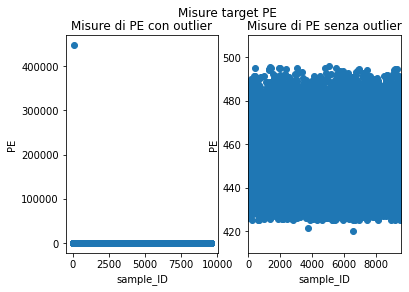

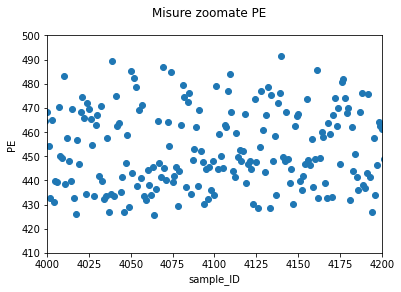

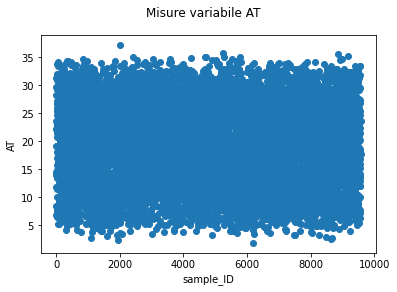

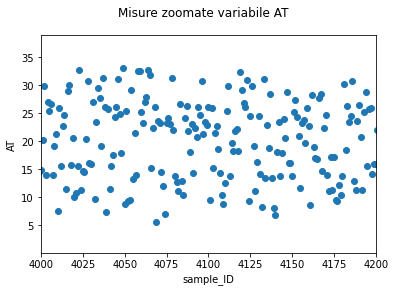

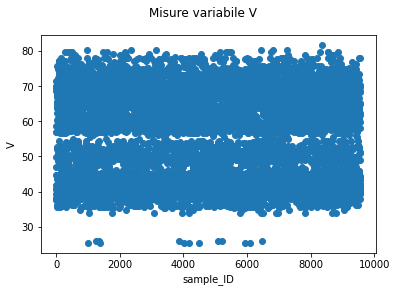

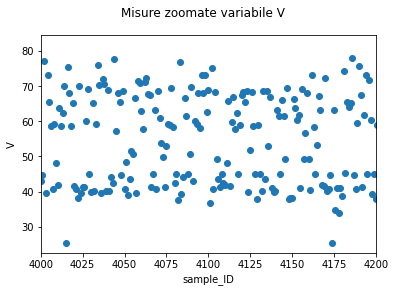

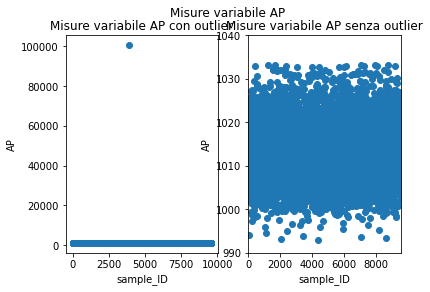

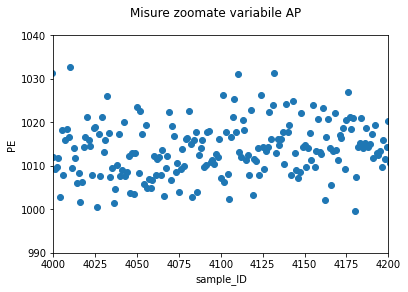

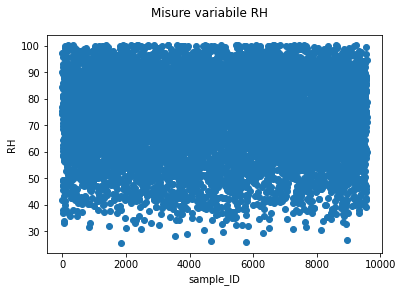

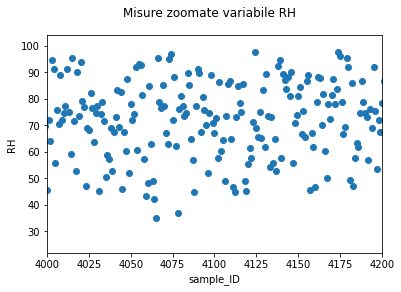

In [3]:
import matplotlib.pyplot as plt

#funzione di utility per il plotting
def reg_selector(col):
    if col == 0:
        return 'AT'
    if col == 1:
        return  'V'
    if col == 2:
        return 'AP'
    if col == 3:
        return 'RH'

f, (ax1, ax2) = plt.subplots(1, 2, sharex=False,sharey=False)
plt.suptitle('Misure target PE')
#plot target con dato corrotto
ax1.plot(index_y, y, 'o')
ax1.set_title('Misure di PE con outlier')
ax1.set(xlabel='sample_ID', ylabel='PE')

#plot target con dati genuini
ax2.plot(index_y, y,'o')
ax2.set_title('Misure di PE senza outlier')
ax2.set(xlabel='sample_ID', ylabel='PE')
ax2.axis([0,len(index_y),410,510])
plt.show()

#plot con zoom, non presente nel codice in repository
#poiché è possibile zoomare a mano
plt.plot(index_y, y, 'o')
plt.suptitle('Misure zoomate PE')
plt.ylabel("PE")
plt.xlabel('sample_ID')
plt.axis([4000,4200,410,500])
plt.show()


#plot dati feature
for col in range(0,4):
#plot con outlier
  
    #se sto plottando feature non problematica seguo il normale itere
  if col!=2:
      plt.plot(index_x, X[:,col], 'o')
      plt.suptitle('Misure variabile '+reg_selector(col))
      plt.ylabel(reg_selector(col))
      plt.xlabel('sample_ID')
      xmin, xmax, ymin, ymax = plt.axis()
      plt.show()

      #plot con zoom, non presente nel codice in repository
      #poiché è possibile zoomare a mano
      plt.plot(index_x, X[:,col], 'o')
      plt.suptitle('Misure zoomate variabile '+reg_selector(col))
      plt.ylabel(reg_selector(col))
      plt.xlabel('sample_ID')
      plt.axis([4000,4200,ymin,ymax])
      plt.show()
      
  else:
      f, (ax1, ax2) = plt.subplots(1, 2, sharex=False,sharey=False)
      plt.suptitle('Misure variabile '+reg_selector(col))
      #plot target con dato corrotto
      ax1.plot(index_x,X[:,col], 'o')
      ax1.set_title('Misure variabile AP con outlier')
      ax1.set(xlabel='sample_ID', ylabel='AP')

      #plot target con dati genuini
      ax2.plot(index_x,X[:,col], 'o')
      ax2.set_title('Misure variabile AP senza outlier')
      ax2.set(xlabel='sample_ID', ylabel='AP')
      ax2.axis([0, len(index_x), 990, 1040])
      plt.show()

      #plot con zoom, non presente nel codice in repository
      #poiché è possibile zoomare a mano
      plt.plot(index_x,X[:,col], 'o')
      plt.suptitle('Misure zoomate variabile AP')
      plt.ylabel("PE")
      plt.xlabel('sample_ID')
      plt.axis([4000,4200, 990, 1040])
      plt.show()


Come è possibile notare dai grafici, sia il target PE che la feature AP presentano un dato fuoriscala rispetto agli altri. Inoltre è anche possibile notare come i valori della varie feature siano di ordini di grandezza diversi.
Oltre a questi problemi, è possibile anche notare che:


1.   Alcune delle tuple presentano dei **None** al posto del valore della misura;
2.   i valori degli ID delle feature e quelli dei target sono sfasati tra 99 e 199, questo poiché vi sono alcuni ID mancanti in entambi i vettori.
Di seguito il codice implementato nelle funzioni **check_for_Null** e **check_different_ID**, usate per riassumere quali sono gli indici problematici.



In [4]:
    print("Il numero di misure è: "+str(len(index_x)))
    print("L'ultimo indice dei target è: "+str(index_y[len(index_y)-1]))
    print("L'ultimo indice dei regressori è: " + str(index_y[len(index_y) - 1]))
    print("Gli indici mancanti dei target sono: 200, 201, 202")
    print("Gli indici mancanti dei target sono: 100, 101, 102" )
    
    for it in range(0,len(index_y)):

        if y[it] is None:
            print("Il target con ID "+str(index_y[it])+" ha valore None")
        if X[it,0] is None:
            print("La misura di "+reg_selector(0) +" con ID "+str(index_x[it])+" ha valore None")
        if X[it,1] is None:
            print("La misura di "+reg_selector(1) +" con ID "+str(index_x[it])+" ha valore None")
        if X[it,2] is None:
            print("La misura di "+reg_selector(2) +" con ID "+str(index_x[it])+" ha valore None")
        if X[it,3] is None:
            print("La misura di "+reg_selector(3) +" con ID "+str(index_x[it])+" ha valore None")

Il numero di misure è: 9565
L'ultimo indice dei target è: 9567
L'ultimo indice dei regressori è: 9567
Gli indici mancanti dei target sono: 200, 201, 202
Gli indici mancanti dei target sono: 100, 101, 102
Il target con ID 1 ha valore None
La misura di AT con ID 3891 ha valore None


Per recuperare i dati effettivamente utilizzabili all'interno della soluzione, si è quindi usato il codice implementato dalla funzione **prepare_matrix_and_target**, esposto di seguito: 

In [5]:
#Sarebbe stato possibile ottenere lo stesso risultato effettuando un join
#tra le 2 tabelle nel campo ID
#Ciò non è stato possibile con il driver utilizzato, poiché non era possibile
#accedere alle singole colonne tramite il loro nome

# lista target
    y = []

    # liste temporanee per i regressori
    AT = []
    V = []
    AP = []
    RH = []

    # matrice finale dei regressori
    X = []

    # indici delle misure di regressori e target
    index_x = []
    index_y = []


    # schema regressori:
    # posizione 0 : indice
    # posizione 1 : AT
    # posizione 2 : V
    # posizione 3 : AP
    # posizione 4 : RH

    # schema target:
    # posizione 0 : indice
    # posizione 1 : PE

    #iteratori di variabili e target
    itx = 0
    ity = 0
    while itx<len(rows_y) and ity < len(rows_y):

        #singola tupla di dati
        elemx = rows_x[itx]
        elemy = rows_y[ity]


        #uno dei due indici ha delle misure mancanti
        if elemx[0] != itx and elemx[0]!=elemy[0]:

            ity = elemx[0]
            elemy = rows_y[ity]

        if elemy[0]!= ity and elemx[0] != elemy[0]:

            itx = ity
            elemx = rows_x[itx]




        if elemx[1] is not None \
                and elemx[2] is not None \
                and elemx[3] is not None \
                and elemx[4] is not None \
                and elemy[1] is not None:

            # ignoro outlier di AP

            if elemx[3] > 1200:
                itx += 1
                ity += 1
                continue
            # ignoro outlier target
            if elemy[1] > 700:
                itx += 1
                ity += 1
                continue

            index_y.append(elemy[0])
            y.append(elemy[1])

            index_x.append(elemx[0])
            AT.append(elemx[1])
            V.append(elemx[2])
            AP.append(elemx[3])
            RH.append(elemx[4])

            X = np.array([AT, V, AP, RH])
            X = X.transpose()
        itx += 1
        ity += 1
    print("Il numero effettivo di dati utilizzabili è quindi: "+str(len(index_y)))

Il numero effettivo di dati utilizzabili è quindi: 9558


**Analisi preliminari sui dati genuini**
Dopo aver rimosso i 10 sample corroti o incompleti dal dataset, si effettuano le seguenti analisi sui dati: 

*   media e varianza dei target;
*   autocorrelazione dei target;
*   matrice di correlazione tra i target.

Di seguito l'implementazione per ottenere i dati sopracitati. Il plot dell'autocorrelazione è implementato nella funzione **get_autocorr_y** all'interno del modulo **data_manipulation.plot_util**.



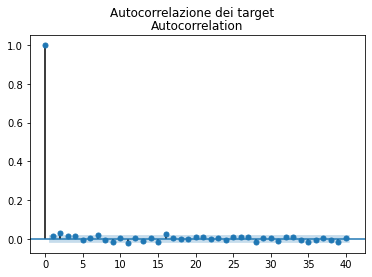

Media dei dati: 454.37179744716474
Varianza dei dati: 291.3689107260784
Matrice di correlazione delle feature: 
[[ 1.          0.8442329  -0.5074059  -0.54252332]
 [ 0.8442329   1.         -0.4137874  -0.31236277]
 [-0.5074059  -0.4137874   1.          0.09913437]
 [-0.54252332 -0.31236277  0.09913437  1.        ]]


In [6]:
    from statsmodels.graphics.tsaplots import plot_acf

    #plot autocorrelazione dei target
    plot_acf(np.asarray(y))
    plt.suptitle("Autocorrelazione dei target")
    plt.show()

    #ricavo media e varianza dei target
    print("Media dei dati: " +str(np.mean(y)))
    print("Varianza dei dati: "+ str(np.var(y)))

    #matrice di correlazione tra le feature
    print("Matrice di correlazione delle feature: ")
    print(np.corrcoef(X.transpose()))

    #Colonne in ordine: AT, V, AP, RH

**Implementazione dei modelli**

Di seguito è riportato il codice per implementare i modelli usati per la regressione. Il codice è contenuto interamente all'interno del file **main**, poiché gran parte della pipeline è gestibile mediante il framework **statsmodels**. I modelli implementati saranno i seguenti:


1.   regressione lineare, mediante le 4 feature fornite **standardizzate**;
2.   regressione lineare, mediante le 4 feature fornite non standardizzate.

La standardizzazione delle variabile prevede la sottrazione della media dai dati e il portarle ad avere varianza unitaria, il processo è attuato anche sulla variabile target, di conseguenza gli output del modello vengono riportati nella scala originaria.

Il dataset è stato diviso in 3 parti:



1.   dataset di training, composto da 8000 samples, circa l'83% dei dati;
2.   dataset di validazione, composto da 500 samples, circa il 5% dei dati;
3.   dataset di test, composto dai restanti 1058 samples, circa l'11% dei dati.

I samples non sono stati rimescolati prima della divisione, poiché i modelli utilizzati non sfruttano dinamiche temporali nei dati, inoltre dall'autocorrelazione dei target, non sembra esserci una dinamica temporale nel processo.




In [0]:
#Divisione del dataset in train, validazione e test

#su 9558 dati validi, 8000 sono usati come training, circa 83%
X_train = X[:8001, :]
y_train = y[:8001]

#ID relativi ai dati di training
index_train = index_y[:8001]

#su 9558 dati validi, 500 sono usati come validazione, circa 5%
X_val = X[8001:8501, :]
y_val = y[8001:8501]

#ID relativi ai dati di validazione
index_val = index_y[8001:8501]

#su 9558 dati validi, 500 sono usati come validazione, circa 11%
X_test = X[8501:, :]
y_test = y[8501:]
index_test = index_y[8501:]

**Standardizzazione dei dati**

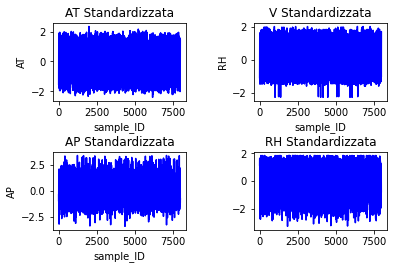

In [8]:
from sklearn.preprocessing import StandardScaler

#plotting implementanto nella funzione "plot_scaled" del modulo
#"data_preparation.plot_util" 

#Riscalo feature rimuovendo media e portando a varianza 1
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_val_scaled = scalerx.transform(X_val)

fig, axs = plt.subplots(2, 2,sharex=False,sharey=False)
fig.tight_layout(pad=3.0)
axs[0, 0].plot(index_train,X_train_scaled[:,0],'b')
axs[0, 0].set_title('AT Standardizzata')
axs[0,0].set(xlabel='sample_ID', ylabel='AT')
axs[0, 1].plot(index_train,X_train_scaled[:,1],'b')
axs[0, 1].set_title('V Standardizzata')
axs[0,1].set(xlabel='sample_ID', ylabel='V')
axs[1, 0].plot(index_train,X_train_scaled[:,2],'b')
axs[1, 0].set_title('AP Standardizzata')
axs[1,0].set(xlabel='sample_ID', ylabel='AP')
axs[1, 1].plot(index_train,X_train_scaled[:,3],'b')
axs[1, 1].set_title('RH Standardizzata')
axs[0,1].set(xlabel='sample_ID', ylabel='RH')
plt.show()


#Riscalo feature rimuovendo media e portando a varianza 1
scalery = StandardScaler()
y_train_scaled = scalery.fit_transform(np.asarray(y_train).reshape(-1,1))

**Creazione dei modelli**


In [9]:
import statsmodels.api as sm

#Creo modello lineare OLS con feature riscalate
modstats_scaled = sm.OLS(y_train_scaled, X_train_scaled)
res_scaled = modstats_scaled.fit()

#Creo modello OLS con feature non riscalate
modstats_not_scaled = sm.OLS(y_train, X_train)
res_not_scaled = modstats_not_scaled.fit()

print("Statistiche modello riscalato")
print(res_scaled.summary())

print("Statistiche modello non riscalato")
print(res_not_scaled.summary())

print("Significatività dei parametri del modello riscalato")
print(res_scaled.pvalues)

print("Significatività dei parametri del modello non riscalato")
print(res_not_scaled.pvalues)

Statistiche modello riscalato
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          2.561e+04
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                        0.00
Time:                        12:38:40   Log-Likelihood:                         -850.33
No. Observations:                8001   AIC:                                      1709.
Df Residuals:                    7997   BIC:                                      1737.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

**Prime valutazioni sui modelli**


1.   R-squared: entambi i modelli hanno un punteggio alto in questo campo, di conseguenza, in training, le feature sembrano spiegare bene la varianza del target. Nel secondo modello il punteggio è maggiore, ma ciò può anche indicare la possibilità di overfitting da parte del modello;
2.   Coefficienti stimati: il segno dei coefficienti stimati risulta il medesimo. A cambiare tra i due è l'importanza data al regresso x3(la variabile AP), la quale passa dall'essere la meno influente(nel primo modello) alla seconda più influente(nel secondo modello);
3.   P-values: questi valori indicano la significatività statistica di ognuno dei coefficienti stimati(ovvero la probabilità che questo sia uguale a 0). Entrambi i modelli concordano sulla significatività della variabile x1(ovvero AT), mentre invece discordano sulla significatività di x3(ovvero AP), dove nel modello con feature standardizzate risulta il meno significativo;
4.  Varianza del modello: in entambi i casi, la varianza dei parametri non risulta essere elevata. Questo è tipico della regressione lineare, che risulta essere un modello con poca varianza, a prezzo del bias dato dalla sua semplicità;
5.  Condition number: in entrambi i modelli il condition number ha valori problematici. Questo valore rappresenta eventuali problemi dati dalla correlazione delle feature; risulta coerente con la matrice di correlazione calcolata, dove solo la correlazione tra x1 e x2 (AT e V) risultava elevata.



**Validazione**

Di seguito vi è il codice con cui è stata implementata la validazione dei modelli. Si è deciso di usare una tecnica standard, anziché fare cross-validazione, poiché il modello è semplice da addrestrare e si dispone di dati a sufficienza per evitare overfitting su un modello lineare.

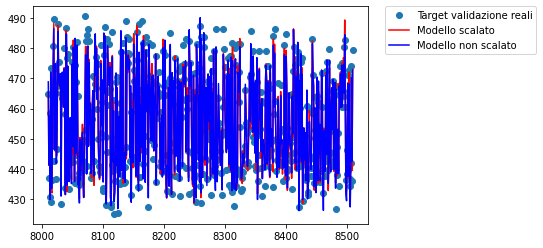

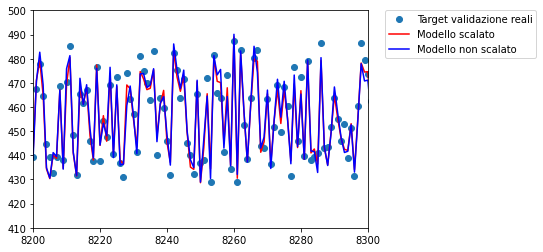

RMSE in validazione modello riscalato
4.261591156774206
RMSE in validazione modello non riscalato
4.742532805554351
Errore medio in validazione modello riscalato
-0.007189135647716612
Errore medio in validazione modello non riscalato
-0.1494010510796487


In [10]:
from statsmodels.tools.eval_measures import rmse

#Uso i modelli sul dataset di validazione

#modello riscalato
y_hat_val_stats_scaled = res_scaled.predict(X_val_scaled)
y_hat_val_stats = scalery.inverse_transform(np.asarray(y_hat_val_stats_scaled).reshape(-1,1))

#modello non riscalato
y_hat_val_stats_not_scaled = res_not_scaled.predict(X_val)

plt.plot(index_val,y_val,'o',label='Target validazione reali')
plt.plot(index_val,y_hat_val_stats,'r',label='Modello scalato')
plt.plot(index_val,y_hat_val_stats_not_scaled,'b',label='Modello non scalato')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#plot zoomato, in repository manca poiché è possibile zoomare i grafici
plt.plot(index_val,y_val,'o',label='Target validazione reali')
plt.plot(index_val,y_hat_val_stats,'r',label='Modello scalato')
plt.plot(index_val,y_hat_val_stats_not_scaled,'b',label='Modello non scalato')
plt.axis([8200,8300,410,500])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print("RMSE in validazione modello riscalato")
print(rmse(y_hat_val_stats,np.asarray(y_val).reshape(-1,1))[0])

print("RMSE in validazione modello non riscalato")
print(rmse(y_hat_val_stats_not_scaled,y_val))

residual_scaled = y_val - y_hat_val_stats
residual_not_scaled = y_val - y_hat_val_stats_not_scaled

print("Errore medio in validazione modello riscalato")
print(np.mean(residual_scaled))

print("Errore medio in validazione modello non riscalato")
print(np.mean(residual_not_scaled))


Dalla validazione, risulta migliore il modello con feature standardizzate, avendo RMSE e media dell'errore minori rispetto al modello con feature non standardizzate.

Si prosegue quindi con la valutazione del modello sul dataset di test, per stimarne la bontà out-of-sample.

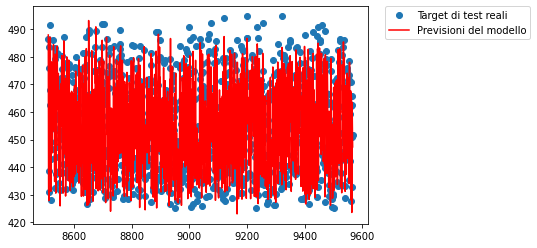

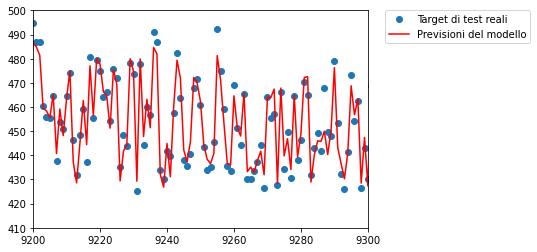

RMSE sul dataset di test
[4.55182987]
Errore medio sul dataset di test
0.2277174833387444


In [11]:
#Riscalo il dataset di test
X_test_scaled = scalerx.transform(X_test)

#Uso il modello per fare predizione sul dataset di tast
y_pred = res_scaled.predict(X_test_scaled)
y_pred_rescaled = scalery.inverse_transform(np.asarray(y_pred).reshape(-1,1))


plt.plot(index_test,y_test,'o',label='Target di test reali')
plt.plot(index_test,y_pred_rescaled,'r',label='Previsioni del modello')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#plot zoomato, in repository manca poiché è possibile zoomare i grafici
plt.plot(index_test,y_test,'o',label='Target di test reali')
plt.plot(index_test,y_pred_rescaled,'r',label='Previsioni del modello')
plt.axis([9200,9300,410,500])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print("RMSE sul dataset di test")
print(rmse(y_pred_rescaled,np.asarray(y_test).reshape(-1,1)))

residual_pred = y_test - y_pred_rescaled

print("Errore medio sul dataset di test")
print(np.mean(residual_pred))

**Conclusioni**

Il modello scelto ha prestazioni simili in termini di RMSE a quelle in validazione; cambia, invence, in modo significativo il valore dell'errore medio che commette, questo anche poiché il dataset di test è grande il doppio rispetto a quello usato per la validazione. Il modello, nonostante la semplicità, sembra riuscire a catturare buona parte delle infromazioni che le feature portano sul target, dando risultati soddisfacenti: un errore medio di 0.23 su una variabile avente valor medio di 454.37 risulta trascurabile. Inoltre anche la varianza dell'errore risulta contenuta.

**Riassunto del processo di risoluzione**

La soluzione proposta segue le seguenti fasi:


1.   recupero dei dati dal database;
2.   pulizia dei dati e rilevazione di dati fuori scala;
3.   preparazione dei dati e divisione del dataset in training, validazione e test
4.   addestramento dei modelli;
5.   validazione e benchmark dei modelli.

**Possibili miglioramenti**

Il modello utilizzato per risolvere il problema risulta uno dei più semplici. Rimanendo sempre in ambito di **regressione lineare** sarebbe possibile introdurre un parametro di regolarizzazione( ad esempio di tipo Ridge o Lasso), anche se in questo caso non vi sono particolari differenze tra i parametri( escluso il parametro di x1).

Un altro modello utilizzabile per la risoluzione è il modello ARMAX, che però è stato escluso in seguito all'analisi dell'autocorrelazione dei dati.

Un altro miglioramento sarebbe quello di introdurre un passo di **feature selection**, ovvero validare dei modelli che presentano come feature tutte le possibili combinazioni, al fine di trovare un modello senza problemi di multicollinearità. Questo processo non è stato attuato dato il basso numero di regressori.

Infine, sarebbe possibile utilizzare modelli non lineari o non parametrici per effettuare la previsione della variabile target, come ad esempio K-nearest neighbors; quest'ultimo approccio non è stato usato poiché non sarebbe stato coerente con la richiesta del problema. Anche l'approccio tramite reti neurali è stato scartato a fronte del numero di sample e della bassa interpetrabilità dei parametri, la quale non avrebbe potuto far rispondere alla domanda: "quale variabile impatta maggiormente sul target PE?".

La regressione lineare, seppur semplice, ha tra i suoi pregi la facilità di interpretazione: dai coefficienti stimati risulta infatti possibile notare come il regressore x1, ovvero la **temperatura atmosferica(AT)** sia la variabile di maggiore impatto. 

